# Маркетинговый анализ приложения Procrastinate Pro+

Несмотря на огромные вложения в рекламу Procrastinate Pro+, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

### Информация о данных

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях - visits_info_short.csv
- выгрузка их покупок за этот период - orders_info_short.csv
- рекламные расходы - costs_info_short.csv

### Предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.


## Оглавление
1. [Загрузка данных и подготовка их к анализу ](#step1)  


2. [Функции для расчета и анализа LTV, ROI, удержания и конверсии](#step2) 

    2.1 [Функции для визуализации метрик](#step21)
    
    
3. [Исследовательский анализ данных](#step3)  
   
   3.1 [Создание пользовательских профилей. Минимальная и максимальная даты привлечения пользователей](#step31)
   
   3.2 [Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.](#step32)
   
   3.3 [Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.](#step33)
   
   3.4 [Каналы, из которых пришло больше всего платящих пользователей.](#step34)
   
   
4. [Маркетинг](#step4) 

    4.1 [Расчет суммы расходов на маркетинг. Как траты распределены по источникам. Визуализация изменения метрик во времени](#step41)
    
    4.2 [Cколько в среднем стоило привлечение одного пользователя из каждого источника. Средний CAC на одного пользователя для всего проекта и для каждого источника трафика.](#step42)
    

5. [Оценка окупаемости рекламы](#step5) 
    
    5.1 [Анализ общей окупаемости рекламы. Графики LTV и ROI, графики динамики LTV, CAC и ROI.](#step51)
    
    5.2 [Анализ окупаемости рекламы с разбивкой по рекламным каналам. Графики LTV и ROI, графики динамики LTV, CAC и ROI.](#step52)
    
    5.3 [Анализ окупаемости рекламы с разбивкой по странам. Графики LTV и ROI, графики динамики LTV, CAC и ROI.](#step53)
    
    5.4 [Графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.](#step54)
    
    
6. [Выводы](#step6)  


    6.1 [Причины неэффективности привлечения пользователей.](#step61)
    
    6.2 [Рекомендации для отдела маркетинга.](#step62)


## 1. Загрузка данных и подготовка их к анализу 
<a id="step1"></a>   


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

try: 
    visits = pd.read_csv('visits_info_short.csv') # данные о посещениях
    orders = pd.read_csv('orders_info_short.csv')  # данные о покупках 
    costs = pd.read_csv('costs_info_short.csv') # данные о рекламных расходах
except: 
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')


In [2]:
for data in [visits, orders, costs]:
    display(data.head())
    display(data.info())
    print('Явные дубликаты:')
    display(data.duplicated().sum())
    print()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Явные дубликаты:


0

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Явные дубликаты:


0

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Явные дубликаты:


0

In [3]:
# приведем названия столбцов к нижнему регистру и уберем пробелы
for data in [visits, orders, costs]:
    data.columns = data.columns.str.lower()
    data.columns = [col.replace(" ", "_") for col in data.columns]
    
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# явных дубликатов нет, проверим наличие неявных:
for data in [visits, orders, costs]:
    for col in data.columns:
        if data[col].dtype == object:
            data[col] = data[col].astype('str')
            data[col] = data[col].str.lower()
            display(pd.DataFrame(data[col].value_counts()))

,region
united states,207327
uk,36419
france,35396
germany,30759


,device
iphone,112603
android,72590
pc,62686
mac,62022


,channel
organic,107760
tiptop,54794
faceboom,49022
wahoonetbanner,20465
leapbob,17013
opplecreativemedia,16794
rocketsuperads,12724
yrabbit,9053
mediatornado,8878
adnonsense,6891


,dt
2019-05-01,10
2019-08-22,10
2019-08-24,10
2019-08-25,10
2019-08-26,10
...,...
2019-07-01,10
2019-07-02,10
2019-07-03,10
2019-07-04,10


,channel
faceboom,180
mediatornado,180
rocketsuperads,180
tiptop,180
yrabbit,180
adnonsense,180
leapbob,180
opplecreativemedia,180
wahoonetbanner,180
lambdamediaads,180


После изменения названий столбцов и приведения данных к нижнему регистру, могут появиться дубликаты

In [4]:
for data in [visits, orders, costs]:
    display(data.head())
    print('Явные дубликаты:')
    display(data.duplicated().sum())
    print()

,user_id,region,device,channel,session_start,session_end
0,981449118918,united states,iphone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,united states,iphone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,united states,mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,united states,android,tiptop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,united states,mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Явные дубликаты:


0

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Явные дубликаты:


0

,dt,channel,costs
0,2019-05-01,faceboom,113.3
1,2019-05-02,faceboom,78.1
2,2019-05-03,faceboom,85.8
3,2019-05-04,faceboom,136.4
4,2019-05-05,faceboom,122.1


Явные дубликаты:


0

**Вывод**
- Пропуски, явные и неявные дубликаты отстутствуют
- Заменили формат даты в visits, orders, costs

## 2. Функции для расчета и анализа LTV, ROI, удержания и конверсии 
<a id="step2"></a>   


In [5]:
def get_profiles(sessions, orders, ad_costs):
 
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
 
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = pd.to_datetime(profiles['first_ts']).dt.date
    profiles['month'] = pd.to_datetime(profiles['first_ts']).astype('datetime64[M]')
 
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
 
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
 
 
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
 
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
 
 
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
 
    # стоимость привлечения органических пользователей равна нулю (и некоторых неорганических тоже)
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
 
 
    return profiles
 
 

In [6]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [7]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [8]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функции для визуализации метрик <a id="step21"></a>   

In [9]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [10]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [11]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [12]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    plt.xticks(rotation=15) 

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    plt.xticks(rotation=15) 

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
    plt.xticks(rotation=15) 
    plt.legend(bbox_to_anchor=(1, 0.6))

    plt.tight_layout()
    plt.show()

## 3. Исследовательский анализ данных 
<a id="step3"></a>   


### 3.1 Создание пользовательских профилей. Минимальная и максимальная даты привлечения пользователей 
<a id="step31"></a> 

In [13]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [14]:
profiles = get_profiles(visits, orders, costs)

display(profiles.head())
#print('Минимальная дата привлечения пользователей', profiles['dt'].min())
#print('Максимальная дата привлечения пользователей', profiles['dt'].max())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769


Посмотрим на прирост новых пользователей и на общую конверсию:

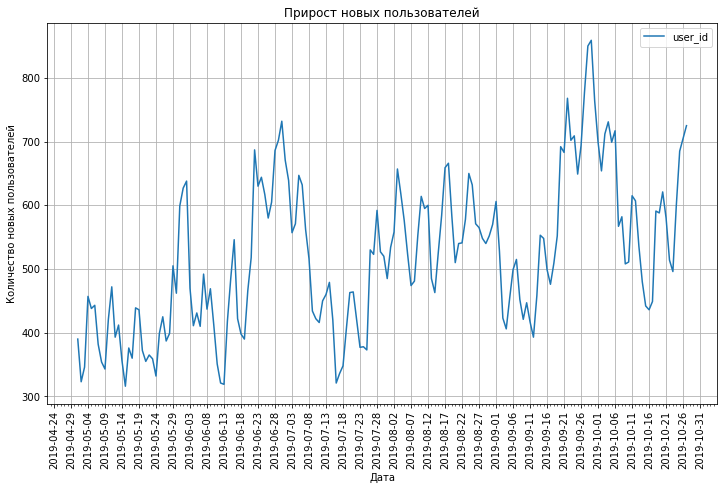

In [15]:
ax = profiles.query('channel != "organic"').pivot_table(index='dt', values='user_id', aggfunc='nunique').plot(grid=True, figsize = (12,7))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.ylabel('Количество новых пользователей')
plt.xlabel('Дата')
plt.title('Прирост новых пользователей')
plt.xticks(rotation=90) 

plt.show()

### 3.2 Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны <a id="step32"></a>   

Рассмотрим пользователей, пришедших с рекламы:

In [16]:
ppart_country = profiles.query('channel != "organic"').groupby('region').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by = 'payer', ascending = False)
ppart_country.columns = ['Общее количество пользователей', 'Доля платящих пользователей, %']
ppart_country['Количество платящих пользователей'] = profiles.query('channel != "organic" and payer == True').groupby('region').agg({'user_id': 'nunique'})
ppart_country['Доля платящих пользователей, %'] = round(ppart_country['Доля платящих пользователей, %']*100, 3)
ppart_country.style.format(
    '{:.2f}').background_gradient('GnBu')

,Общее количество пользователей,"Доля платящих пользователей, %",Количество платящих пользователей
region,,,
united states,61829.00,9.88,6108.00
germany,9528.00,5.14,490.00
uk,11154.00,5.10,569.00
france,11058.00,5.01,554.00


Большая доля платящих пользователей приходится на США (7.72% - 61829 - уникальных пользователя, из них платящих 6108)
Меньше всего пользователей из Германии, из-за чего доля платящих пользователей велика и количество платящих пользователей также самое маленькое.

### 3.3  Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства. <a id="step33"></a>

In [17]:
ppart_device = profiles.query('channel != "organic"').groupby('device').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by = 'payer', ascending = False)
ppart_device.columns = ['Общее количество пользователей', 'Доля платящих пользователей, %']
ppart_device['Количество платящих пользователей'] = profiles.query('channel != "organic" and payer == True').groupby('device').agg({'user_id': 'nunique'})
ppart_device['Доля платящих пользователей, %'] = round(ppart_device['Доля платящих пользователей, %']*100, 3)
ppart_device.style.format(
    '{:.2f}').background_gradient('GnBu')

,Общее количество пользователей,"Доля платящих пользователей, %",Количество платящих пользователей
device,,,
mac,18693.00,8.95,1673.00
iphone,33882.00,8.77,2972.00
android,21841.00,8.16,1782.00
pc,19153.00,6.76,1294.00


Клиенты пользуются mac, iphone, android и pc, доля платящих пользователей первых трех устройств около 8%, но больше всего пользователей iphone, количество платящих пользователей также больше.

### 3.4 Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения. <a id="step34"></a> 

In [18]:
ppart_channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by = 'payer', ascending = False)
ppart_channel.columns = ['Общее количество пользователей', 'Доля платящих пользователей, %']
ppart_channel['Количество платящих пользователей'] = profiles.query('payer == True').groupby('channel').agg({'user_id': 'nunique'})
ppart_channel['Доля платящих пользователей, %'] = round(ppart_channel['Доля платящих пользователей, %']*100, 3)
ppart_channel.style.format(
    '{:.2f}').background_gradient('GnBu')

,Общее количество пользователей,"Доля платящих пользователей, %",Количество платящих пользователей
channel,,,
faceboom,29144.00,12.21,3557.00
adnonsense,3880.00,11.34,440.00
lambdamediaads,2149.00,10.47,225.00
tiptop,19561.00,9.60,1878.00
rocketsuperads,4448.00,7.91,352.00
wahoonetbanner,8553.00,5.30,453.00
yrabbit,4312.00,3.83,165.00
mediatornado,4364.00,3.58,156.00
leapbob,8553.00,3.06,262.00


На первом месте по конверсии в покупателя facebook, было привлечено 29144 уникальных пользователя, из них 12% стали покупателями. На третьем месте по количеству привлеченных пользователей площадка tiptop (19561 - из них 9.44% стали покупателями).

Посмотрим на пользователей, пришедших по органическому трафику

In [19]:
ppart_country_org = profiles.query('channel == "organic"').groupby('region').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by = 'payer', ascending = False)
ppart_country_org.columns = ['Общее количество пользователей', 'Доля платящих пользователей, %']
ppart_country_org['Количество платящих пользователей'] = profiles.query('channel == "organic" and payer == True').groupby('region').agg({'user_id': 'nunique'})
ppart_country_org['Доля платящих пользователей, %'] = round(ppart_country_org['Доля платящих пользователей, %']*100, 3)
ppart_country_org.style.format(
    '{:.2f}').background_gradient('GnBu')

,Общее количество пользователей,"Доля платящих пользователей, %",Количество платящих пользователей
region,,,
germany,5453.00,2.31,126.00
united states,38173.00,2.08,794.00
uk,6421.00,2.04,131.00
france,6392.00,1.71,109.00


In [20]:
ppart_device_org = profiles.query('channel == "organic"').groupby('device').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by = 'payer', ascending = False)
ppart_device_org.columns = ['Общее количество пользователей', 'Доля платящих пользователей, %']
ppart_device_org['Количество платящих пользователей'] = profiles.query('channel == "organic" and payer == True').groupby('device').agg({'user_id': 'nunique'})
ppart_device_org['Доля платящих пользователей, %'] = round(ppart_device_org['Доля платящих пользователей, %']*100, 3)
ppart_device_org.style.format(
    '{:.2f}').background_gradient('GnBu')

,Общее количество пользователей,"Доля платящих пользователей, %",Количество платящих пользователей
device,,,
pc,11302.00,2.15,243.00
mac,11349.00,2.11,239.00
android,13191.00,2.03,268.00
iphone,20597.00,1.99,410.00


По органическому трафику большее количество пользователей из США (в среднем в 6-7 раз больше пользователей в сравнении с другими регионами), при этом доля платящих 2,06 % - не самый болшой процент, но характеризует самое большое количество платящих пользователей. Большая доля платящих приходится на пользователей из Германии - 2,31%, но там меньше пользователей в принципе.

Больше всего по органике перешло пользователей Iphone, они же характеризуются большим количеством платящих, при этом большая доля платящих приходится на пользователей перешедших из pc.

Больше всего пользователей перешло по органике (56439), из них доля платящих составила 2,06% (1160 пользователей).

**Выводы**
- Данные предоставлены за период в полгода
- Большая доля платящих пользователей приходится на США (7.72% - 61829 - уникальных пользователя, из них платящих 6108)
- Клиенты пользуются mac, iphone, android и pc, доля платящих пользователей первых трех устройств около 8%, но больше всего пользователей iphone, количество платящих пользователей также больше. 
- На первом месте по конверсии в покупателя facebook, было привлечено 29144 уникальных пользователя, из них 12% стали покупателями. На третьем месте по количеству привлеченных пользователей площадка tiptop (19561 - из них 9.44% стали покупателями). 
- По количеству платящих пользователей топ приходится на каналы: faceboom (3557), tiptop (1878), organic (1160), wahoonetbanner (453).
- Больше всего пользователей перешло по органике (56439), из них доля платящих составила 2,06% (1160 пользователей).

## 4. Маркетинг <a id="step4"></a>   
</div>

### 4.1 Расчет суммы расходов на маркетинг. Как траты распределены по источникам. Визуализация изменения метрик во времени <a id="step41"></a> 

Суммарные траты на рекламу по каналам:

In [21]:
costs = profiles.query('channel != "organic"').pivot_table(
    columns = 'channel', 
    values = 'acquisition_cost', 
    aggfunc = 'sum'
).T.sort_values(by='acquisition_cost', ascending=False)
costs.style.format(
    '{:.2f}').background_gradient('GnBu')

,acquisition_cost
channel,
tiptop,54751.30
faceboom,32445.60
wahoonetbanner,5151.00
adnonsense,3911.25
opplecreativemedia,2151.25
rocketsuperads,1833.00
leapbob,1797.60
lambdamediaads,1557.60
mediatornado,954.48


Посмотрим на ежемесячные траты компании на разных каналах:

month,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00
channel,,,,,,
adnonsense,1169.70,538.65,504.00,579.60,581.70,537.60
faceboom,3524.40,5501.10,5294.30,6274.40,6114.90,5736.50
lambdamediaads,458.40,199.20,219.20,220.00,247.20,213.60
leapbob,140.28,314.58,313.53,369.81,343.98,315.42
mediatornado,238.56,138.00,138.48,154.56,144.72,140.16
opplecreativemedia,169.75,370.00,366.50,439.25,427.75,378.00
rocketsuperads,577.98,325.72,252.07,253.11,218.40,205.72
tiptop,2981.00,6675.60,8410.20,11202.00,13232.50,12250.00
wahoonetbanner,418.80,921.00,851.40,1040.40,977.40,942.00


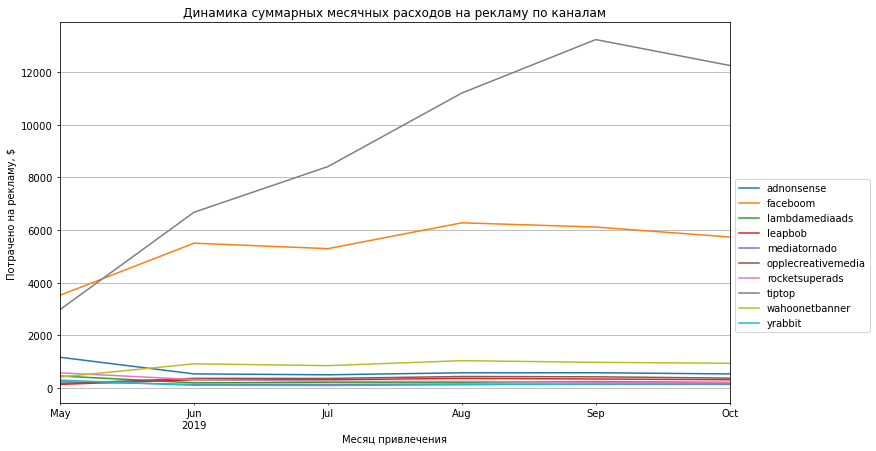

In [22]:
costs = profiles.query('channel != "organic"').pivot_table(
    index = 'month', columns = 'channel', values = 'acquisition_cost', aggfunc = 'sum'
)
display(costs.T.style.format(
    '{:.2f}').background_gradient('GnBu'))

costs.plot(grid=True, figsize = (12,7))
plt.ylabel('Потрачено на рекламу, $')
plt.xlabel('Месяц привлечения')
plt.title('Динамика суммарных месячных расходов на рекламу по каналам')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

Теперь рассмотрим средние значения трат по каналам на протяжении всего периода:

In [23]:
costs.describe().T.sort_values(by = 'mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
channel,,,,,,,,
tiptop,6.0,9125.216667,3878.410638,2981.000,7109.2500,9806.100,11988.00000,13232.50
faceboom,6.0,5407.600000,992.754967,3524.400,5346.0000,5618.800,6020.30000,6274.40
wahoonetbanner,6.0,858.500000,224.272076,418.800,868.8000,931.500,968.55000,1040.40
adnonsense,6.0,651.875000,255.357251,504.000,537.8625,559.125,581.17500,1169.70
opplecreativemedia,6.0,358.541667,97.487617,169.750,367.3750,374.000,415.31250,439.25
rocketsuperads,6.0,305.500000,139.853448,205.725,226.8175,252.590,307.56375,577.98
leapbob,6.0,299.600000,81.179565,140.280,313.7925,315.000,336.84000,369.81
lambdamediaads,6.0,259.600000,98.630300,199.200,215.0000,219.600,240.40000,458.40
mediatornado,6.0,159.080000,39.421829,138.000,138.9000,142.440,152.10000,238.56


In [24]:
costs

channel,adnonsense,faceboom,lambdamediaads,leapbob,mediatornado,opplecreativemedia,rocketsuperads,tiptop,wahoonetbanner,yrabbit
month,,,,,,,,,,
2019-05-01,1169.70,3524.4,458.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70
2019-06-01,538.65,5501.1,199.2,314.58,138.00,370.00,325.715,6675.6,921.0,106.20
2019-07-01,504.00,5294.3,219.2,313.53,138.48,366.50,252.070,8410.2,851.4,97.38
2019-08-01,579.60,6274.4,220.0,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74
2019-09-01,581.70,6114.9,247.2,343.98,144.72,427.75,218.400,13232.5,977.4,152.79
2019-10-01,537.60,5736.5,213.6,315.42,140.16,378.00,205.725,12250.0,942.0,163.41


In [25]:
costs['total'] = costs['adnonsense']+costs['faceboom']+costs['lambdamediaads']+costs['leapbob']+costs['mediatornado']+costs['opplecreativemedia']+costs['rocketsuperads']+costs['tiptop']+costs['wahoonetbanner']+costs['yrabbit']
print('Средние месячные расходы на рекламу составили: ', round(costs['total'].mean(), 2))


Средние месячные расходы на рекламу составили:  17582.88


Посмотрим на динамику расходов в течение периода:

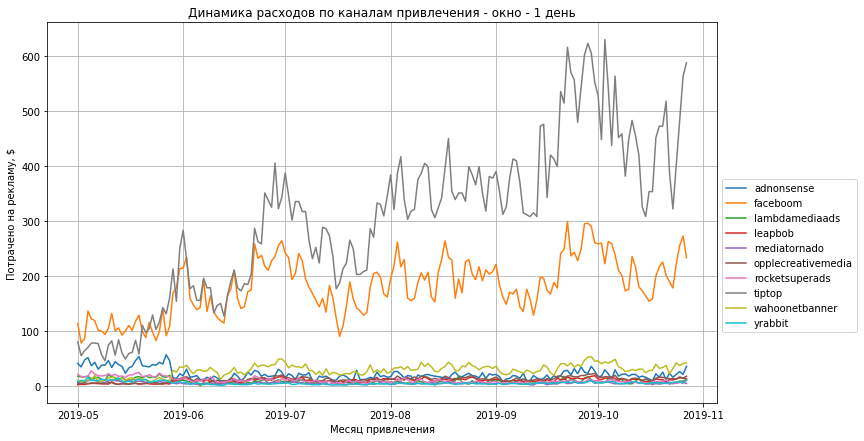

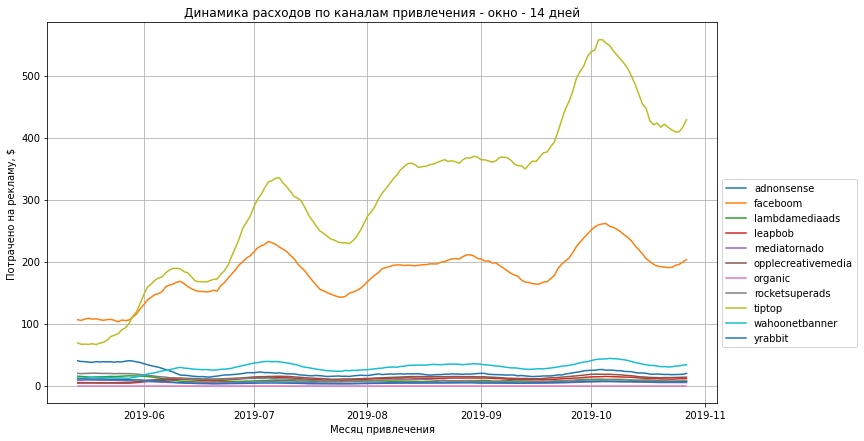

In [26]:
filter_data(profiles.query('channel != "organic"').pivot_table(
    index = 'dt', columns = 'channel', values = 'acquisition_cost', aggfunc = 'sum'
), 1).plot(grid=True, figsize = (12,7))
plt.ylabel('Потрачено на рекламу, $')
plt.xlabel('Месяц привлечения')
plt.title('Динамика расходов по каналам привлечения - окно - 1 день')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

filter_data(profiles.pivot_table(
    index = 'dt', columns = 'channel', values = 'acquisition_cost', aggfunc = 'sum'
), 14).plot(grid=True, figsize = (12,7))
plt.ylabel('Потрачено на рекламу, $')
plt.xlabel('Месяц привлечения')
plt.title('Динамика расходов по каналам привлечения - окно - 14 дней')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()


**Вывод**
- За изучаемый период компания больше всего вложила денег на привлечение из tiptop, далее - faceboom. В остальные источники трафика компания не вкладывалась более 1000 $ в месяц, в среднем - 291,9 в месяц.

- Средний рекламный бюджет компании - 17582 $ в месяц.

- Максимальная сумма, которую выделяла компания на запуск рекламы составила 20784 $, и при этом выручка была минимальной за весь период. 

- Рекламные кампании запускались не каждый день

### 4.2 Cколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитайте средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используйте профили пользователей. <a id="step42"></a> 

In [27]:
print('Средняя стоимость привлечения клиента за все время:', round(profiles.query('channel != "organic"')['acquisition_cost'].sum()/profiles.query('channel != "organic"')['user_id'].nunique(), 3))

Средняя стоимость привлечения клиента за все время: 1.127


Посмотрим на среднемесячную стоимость привлечения клиента в разбивке по каналам

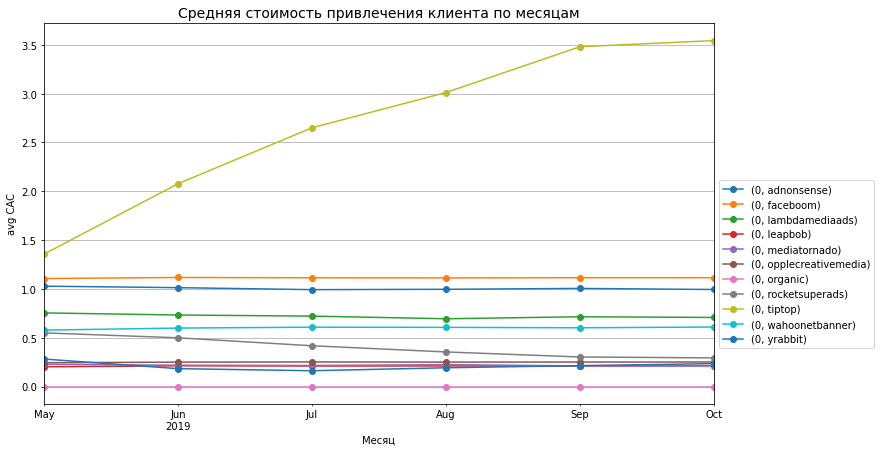

In [28]:
avg_cac = pd.DataFrame(profiles.groupby(['channel', 'month'])['acquisition_cost'].sum()/profiles.groupby(['channel', 'month'])['user_id'].nunique())
avg_cac = avg_cac.pivot_table(index = 'month', columns = 'channel')
display(avg_cac.T.style.format(
    '{:.2f}').background_gradient('GnBu'))

# График средней стоимости привлечения клиента по месяцам в разбивке по каналам
avg_cac.plot(figsize=(12, 7), style = '-o', grid = True)
plt.title('Средняя стоимость привлечения клиента по месяцам', fontsize=14)
plt.xlabel('Месяц')
plt.ylabel('avg CAC')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

Посмотрим на среднюю стоимость привлечения клиента по каналам:

In [29]:
avg_cac.describe().T.sort_values(by = 'mean', ascending=False)

count      mean       std       min       25%       50%  \
  channel                                                                       
0 tiptop                6.0  2.686822  0.849536  1.357468  2.220901  2.830921   
  faceboom              6.0  1.112851  0.003737  1.105868  1.112479  1.113984   
  adnonsense            6.0  1.004456  0.013808  0.992126  0.994256  1.000270   
  lambdamediaads        6.0  0.720516  0.020845  0.694006  0.709076  0.717752   
  wahoonetbanner        6.0  0.600089  0.011708  0.577655  0.599200  0.603709   
  rocketsuperads        6.0  0.402515  0.105269  0.293056  0.315370  0.385667   
  opplecreativemedia    6.0  0.249413  0.002935  0.243544  0.249909  0.250364   
  mediatornado          6.0  0.217916  0.006525  0.210962  0.212633  0.216860   
  yrabbit               6.0  0.210906  0.042602  0.161493  0.185068  0.202950   
  leapbob               6.0  0.209420  0.003819  0.201842  0.209991  0.210432   
  organic               6.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                           75%       max  
  channel                                 
0 tiptop              3.363126  3.543535  
  faceboom            1.114405  1.116748  
  adnonsense          1.010541  1.027856  
  lambdamediaads      0.729528  0.753947  
  wahoonetbanner      0.607267  0.609314  
  rocketsuperads      0.478432  0.549411  
  opplecreativemedia  0.250769  0.251544  
  mediatornado        0.222832  0.226768  
  yrabbit             0.229082  0.281144  
  leapbob             0.211391  0.212261  
  organic             0.000000  0.000000

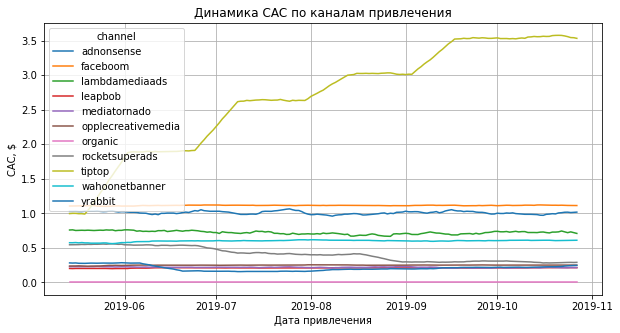

In [30]:
filter_data(profiles.pivot_table(
    index = 'dt', columns = 'channel', values = 'acquisition_cost', aggfunc = 'mean'
), 14).plot(grid=True, figsize = (10,5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика CAC по каналам привлечения')
plt.show()

**Вывод**

- Самый дорогой пользователь приходит с канала tiptop, привлечение стоит в 2-3 раза больше, чем на остальных каналах, при этом стоимость привлечения постоянно растет.
- Средняя стоимость привлечения клиента за все время: 1.127, заметим, что такой перекос создавала высокая CAC по tiptop'у.
- Для канала rocketsuperads характерно снижение стоимости клиента.
- Для остальных каналов CAC не меняется.
- Обратим внимание на wahoonetbanner: конверсия была чуть выше средней при относительно низкой средней стоимости привлечения и небольших трат (относительно всего рекламного бюджета) на рекламные кампании.

## 5. Оценка окупаемости рекламы <a id="step5"></a>   

Для начала посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi(). Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

### 5.1. Проанализируйте общую окупаемость рекламы. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI. <a id="step51"></a>   

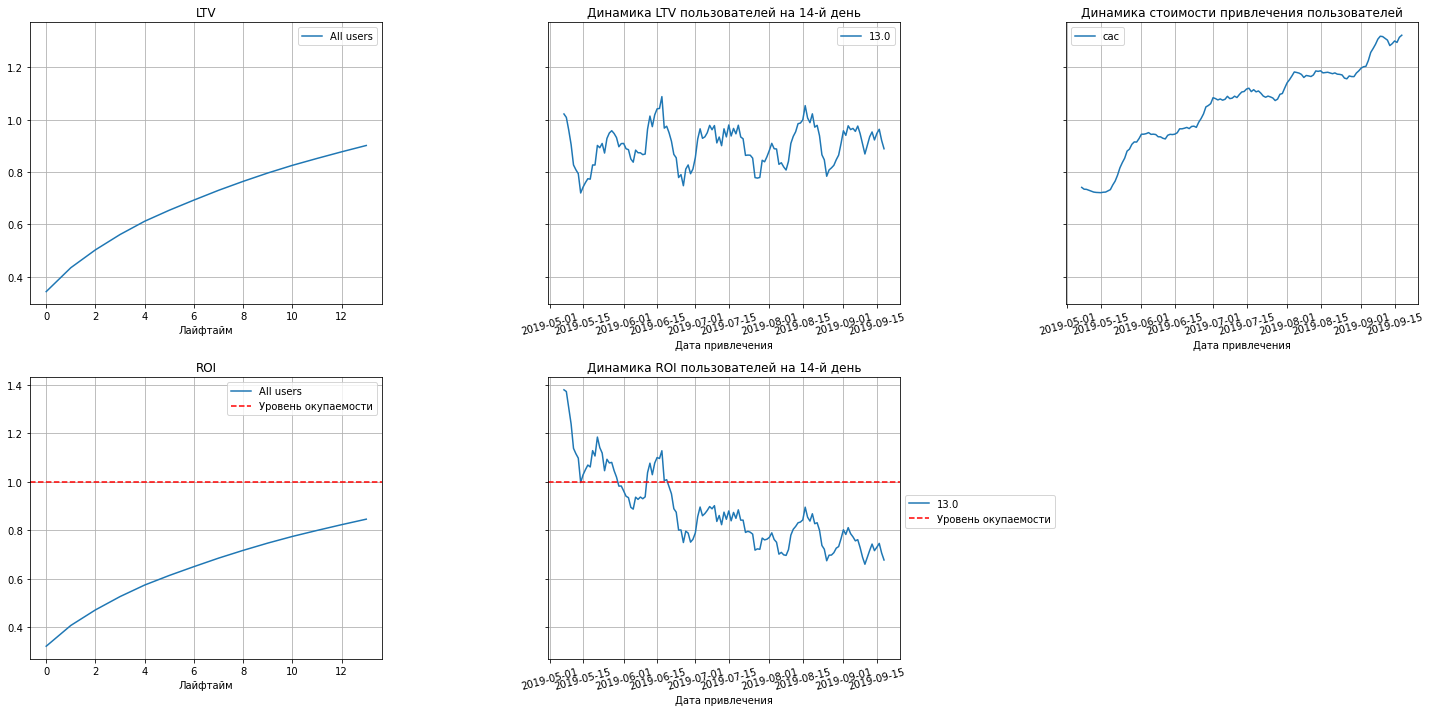

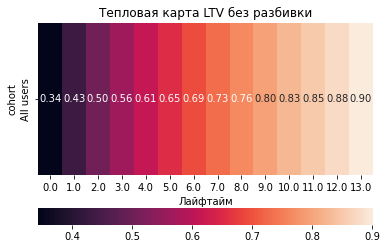

In [31]:
observation_date = datetime(2019, 10, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

sns.heatmap(ltv_grouped.drop(columns=['cohort_size']), annot=True, fmt='.2f', cbar_kws= {'orientation': 'horizontal'} )
plt.title('Тепловая карта LTV без разбивки')
plt.xlabel('Лайфтайм')
plt.show()

In [32]:
print(round(pd.DataFrame(roi_grouped.T), 4))  # таблица ROI 

cohort        All users
cohort_size  68821.0000
cac              1.0660
0.0              0.3219
1.0              0.4076
2.0              0.4717
3.0              0.5266
4.0              0.5742
5.0              0.6137
6.0              0.6501
7.0              0.6851
8.0              0.7172
9.0              0.7472
10.0             0.7746
11.0             0.7993
12.0             0.8231
13.0             0.8458


**Вывод**
- Кривая LTV постоянно растёт ожидаемым образом. 
- Реклама не окупается
- CAC растет
- Двухнедельный LTV пользователей, зарегистрировавшихся за весь период, составил 90 центов, при средней стоимости привлечения клиента за все время 1.127 $.

### 5.2. Анализ окупаемости рекламы с разбивкой по рекламным каналам. Графики LTV и ROI, графики динамики LTV, CAC и ROI. <a id="step52"></a>   

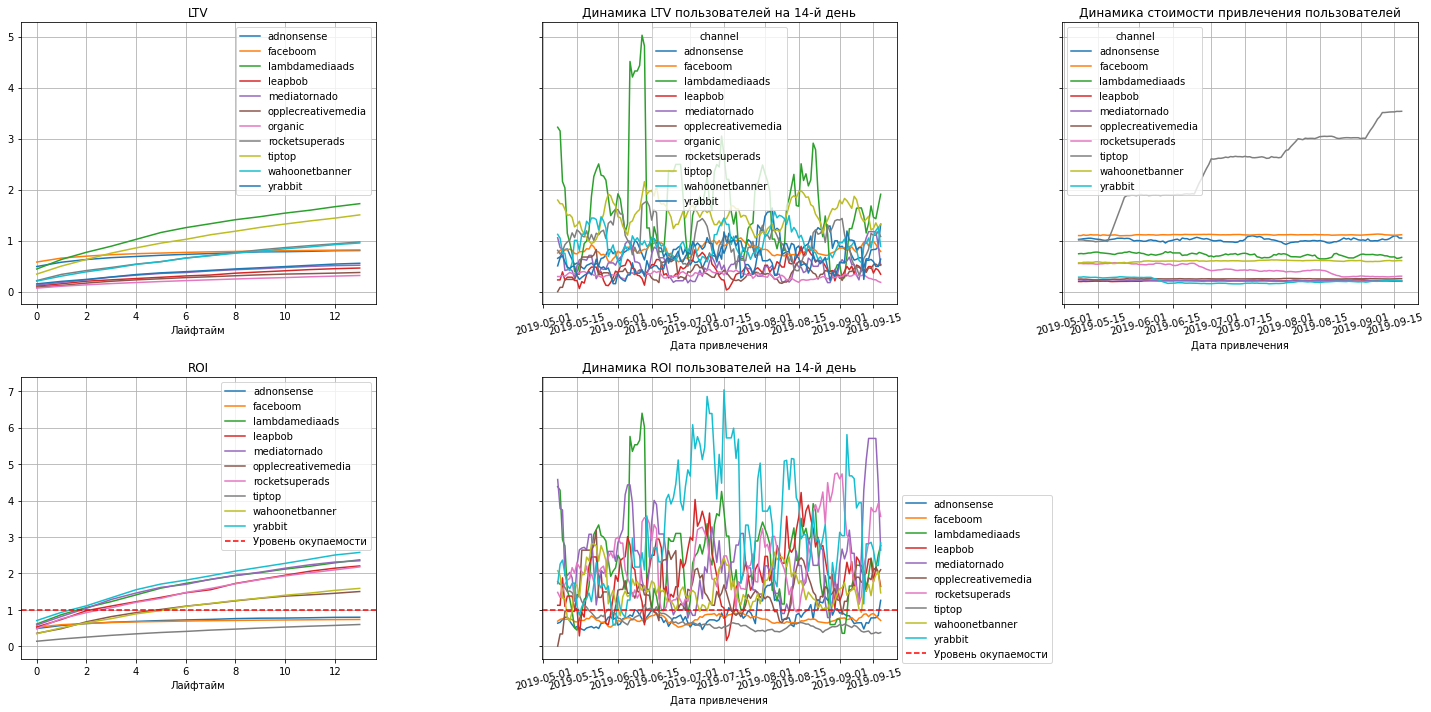

In [33]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)



- Есть ряд каналов, запуск рекламы на которых окупается уже во второй день: yarabbit, mediatornado, lamdamediaads.
- LTV ожидаемо растет на всех каналах. Обратим внимание на стремительный рост по каналам lamdamediaads, tiptop; wahoonetbanner, rocketsuperads. 
- Реклама не везде окупается: в tiptop значение ROI едва доходит до единицы. Но думаю, это связано с тем, что платформа, скорее всего, нацелена на охват аудитории - знакомство с продуктом (?) 
- Есть ряд каналов, запуск рекламы на которых окупается уже в первый день: yarabbit, mediatornado, lamdamediaads.
- Несмотря на огромные вложения в tiptop, размещение рекламы на данной платформе не окупает расходы.
- Особенно плохо, что не окупаются каналы, на которые тратится больше всего денег

### 5.3. Анализ окупаемости рекламы с разбивкой по странам. Графики LTV и ROI, графики динамики LTV, CAC и ROI. <a id="step53"></a>

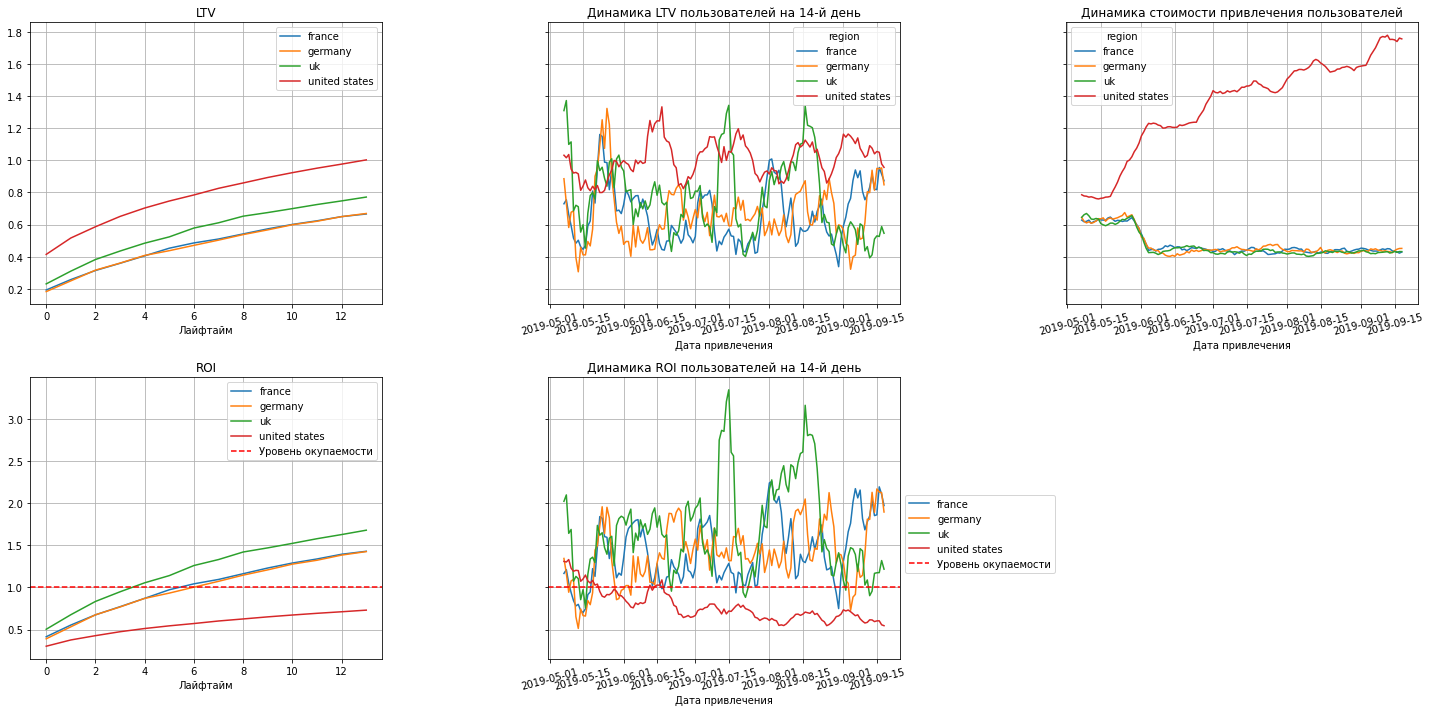

In [34]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions = ['region']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- Привлечение пользователей Франции, Англии и Германии окупается на второй день, в то время как привлечение пользователей из Америки - не окупаеся 
- Больше всего денег приносит клиент из Штатов, причем стоимость его привлечения значительно выше, чем в других регионах
- Скачки в динамике ROI связаны с запуском рекламных кампаний в определенные моменты времени.

Стоит обратить внимание на пользователей из Америки - почему такая высокая стоимость привлечения в сравнении с другими регионами? 

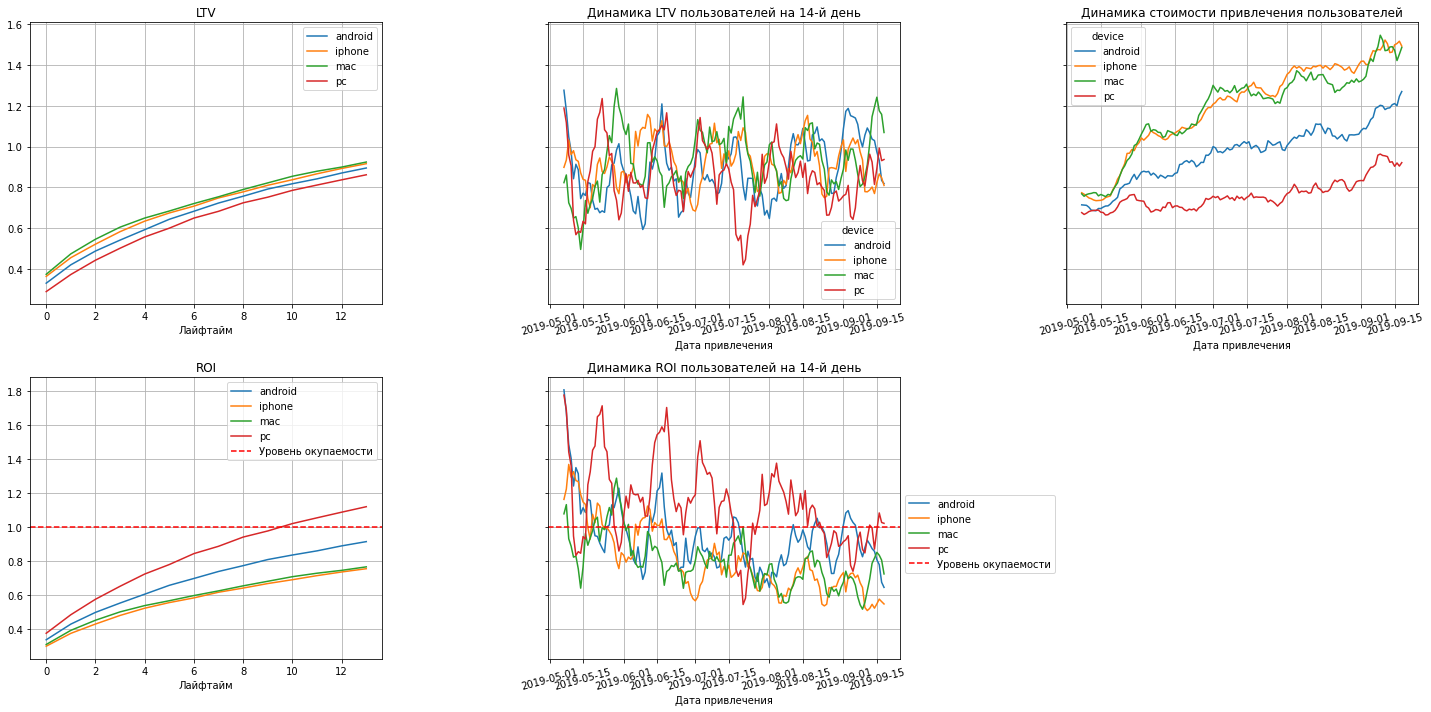

In [35]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions = ['device']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Из всех устройств реклама за 2 недели окупается только на pc, если смотреть на показатель LTV в динамике, реклама не всегда окупалась. Возможно это связано с тем, что реклама в целом не окупалась в штатах.

Проверим гипотезу, что реклама в разбивке по устройствам не окупается из-за того, что не окупается просто в отдельном регионе - Америке.

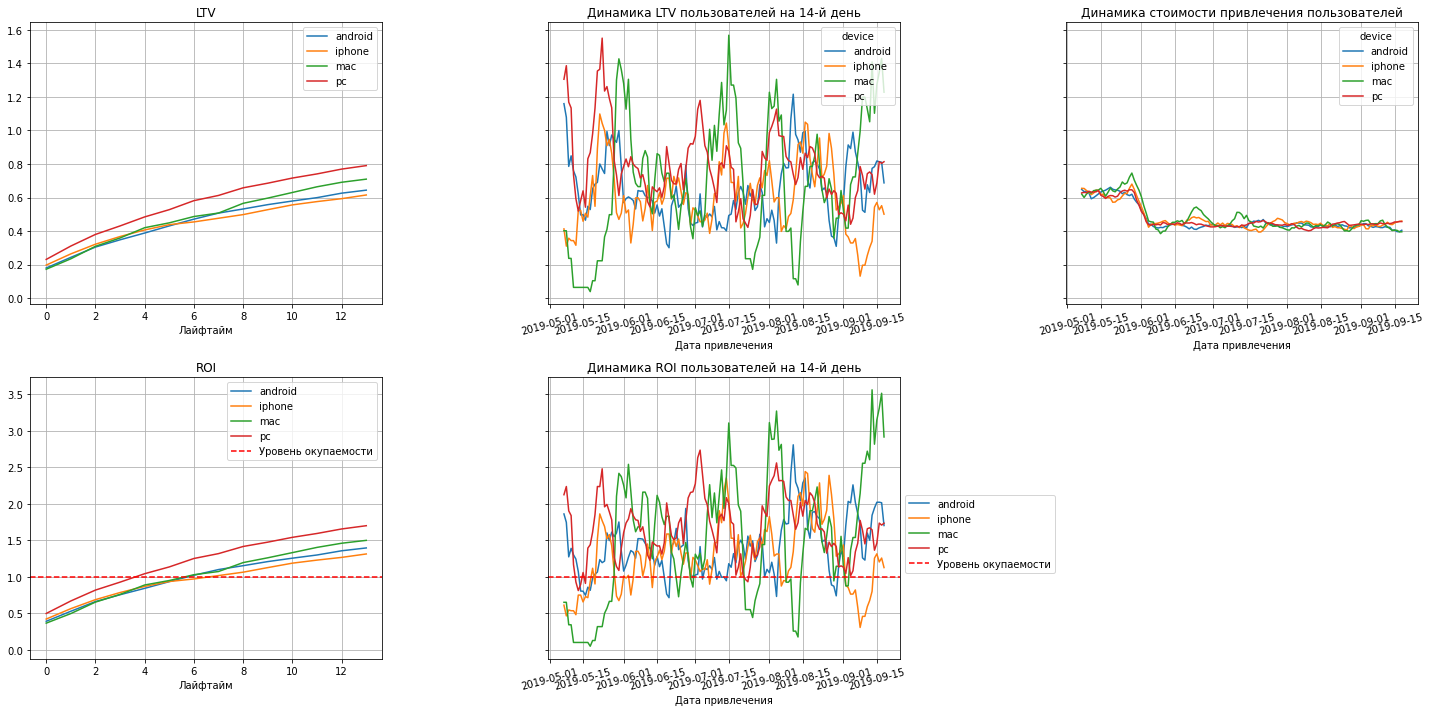

In [36]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic" and region !="united states"'), orders, observation_date, horizon_days, dimensions = ['device']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Предположение оказалось верным, возврат на инвестиции в разбивке по устройствам портят итоги рекламных кампаний в Америке.

**Вывод**
- Привлечение пользователей Франции, Англии и Германии окупается на второй день, в то время как привлечение пользователей из Америки - не окупаеся.
- Больше всего денег приносит клиент из Штатов, причем стоимость его привлечения значительно выше, чем в других регионах.
- Возврат на инвестиции в разбивке по устройствам портят итоги рекламных кампаний в Америке.

### 5.4. Постройте и изучите графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам. <a id="step51"></a>   


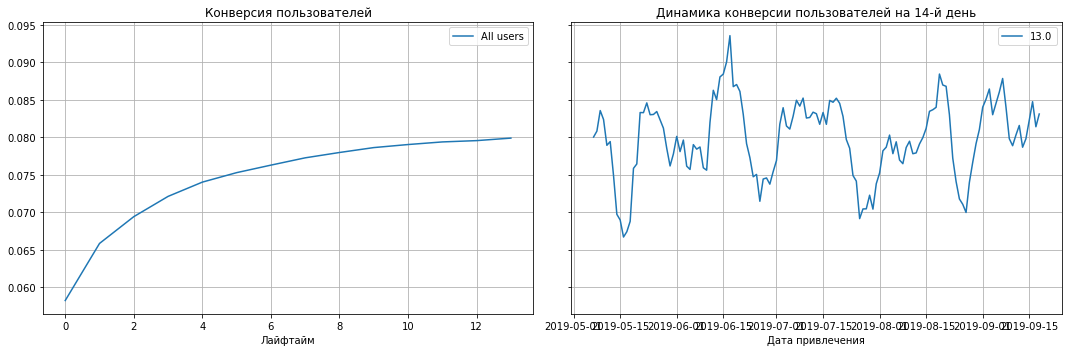

In [37]:
observation_date = datetime(2019, 10, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

# смотрим конверсию 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Больше всего пользователей было привлечено в конце сентября (26.09-01.10). О качестве не можем судить, тк нет конверсии за этот период. 
Пики по количеству привлеченных пользователей также пришлись на период 29 мая - 3 июня, 28 июня - 3 июля (Характеризуются низкой конверсией) 

Дно по количеству новых пользователей пришлось на периоды: начало мая (несколько, похоже только стартовали?), 8-13 июня, 13-18 июля. К середине мая конверсия в платящих была самой низкой, видимо запуск был не очень хороший. 

Конверсия в пользователей росла с середины мая до начала июня (количество новых пользователей в этот период тоже росло); вторая неделя июня - середина июня (характеризовался минимальным приростом количества новых пользователей) - плохо

Когда конверсия падала, были пики в количестве привлеченных пользователей, но при этом конверсия не падала ниже 7%. Круто.

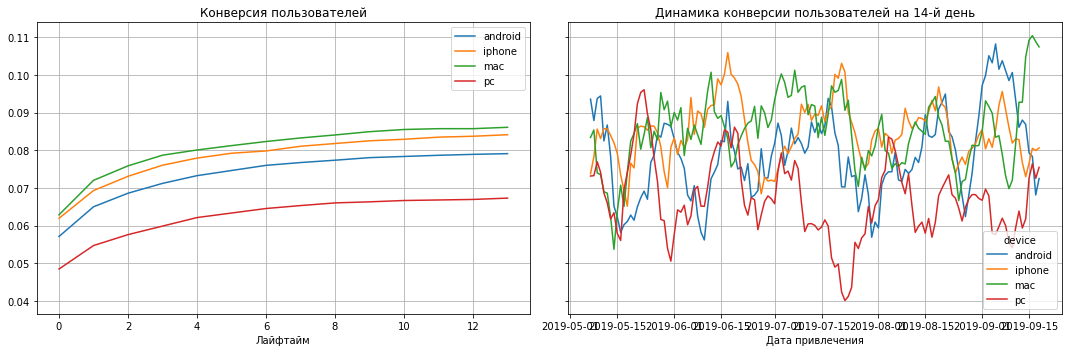

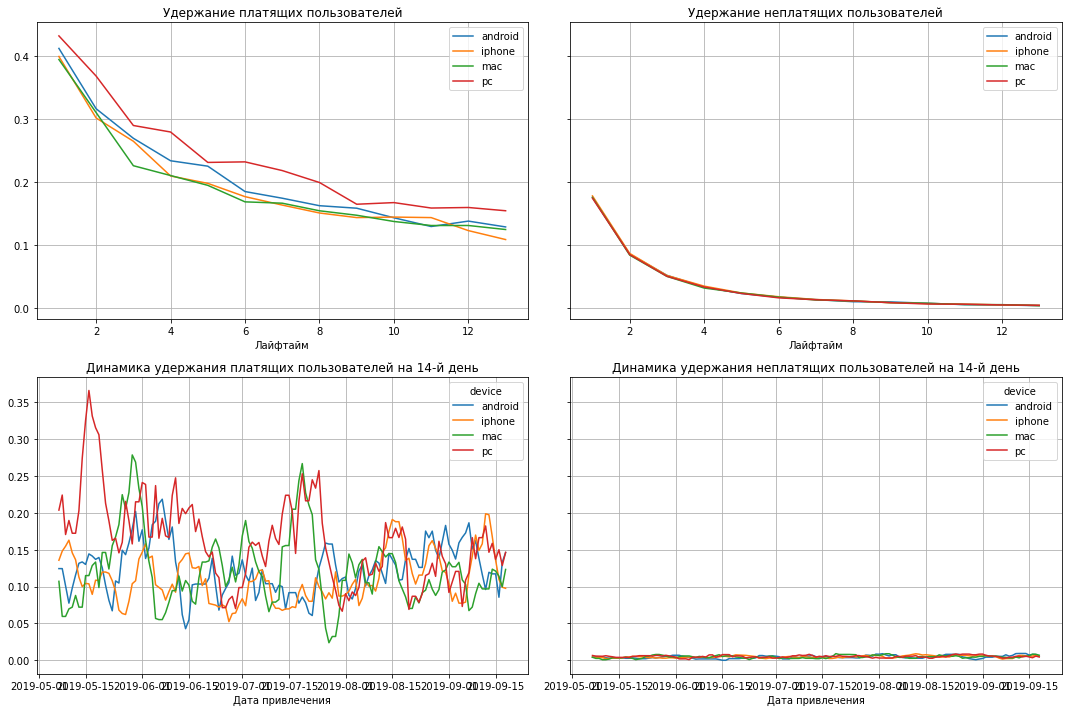

In [38]:
# смотрим конверсию с разбивкой по устройствам - 2 графика

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

- Конверсия пользователей mac, iphone android выше, чем пользователей pc, но при этом удержание платящих пользователей pc на 14 день лучше -  у PC может возникать ошибка при оплате первой покупки? Очень подозрительная конверсия при прочих равных
- Конвертация пользователей не стабильна.
- Кривая удержания платящих пользователей выше, чем неплатящих, и обе кривые постепенно снижаются.
- В целом платящие пользователи плохо удерживаются: если пиковые значения равны 35%, то в общей массе до 14 дня доходят только 10-15%

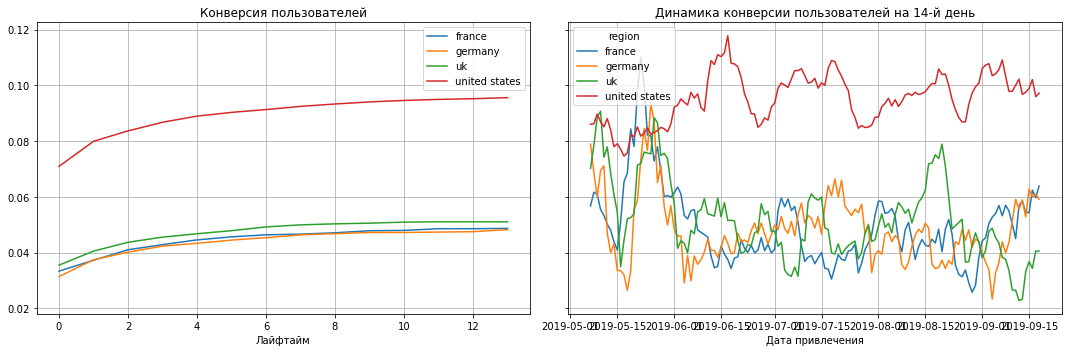

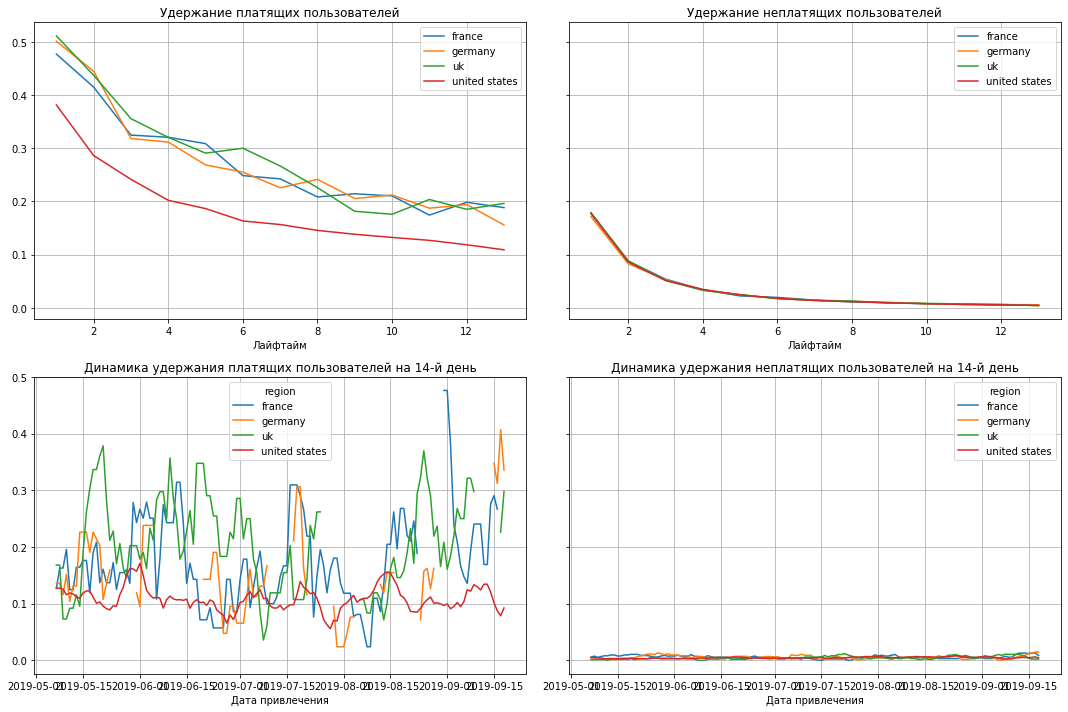

In [39]:
# смотрим конверсию с разбивкой по странам - 2 графика

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

- Американские пользователи конвертируются очень хорошо, причем постоянно, но стабильно плохо удерживаются. Думаю, стоит посмотреть, на каких платформах и где запускались рекламные кампании в этом регионе
- LTV у пользователей США самый большой! Возможно, привлекается много людей, но часто не тех, кто заинтересован в продукте
- В Англии, Франции, Германии не все время велась рекламная кампания. Возможно, это повлияло на конверсию в данных регионах. Пробелы в данных связаны с их отстутствием - были ли платящие пользователи, которые удерживались 14 дней??

Проверим гипотезу о разном количестве рекламных кампаний, проводимых в каждом регионе

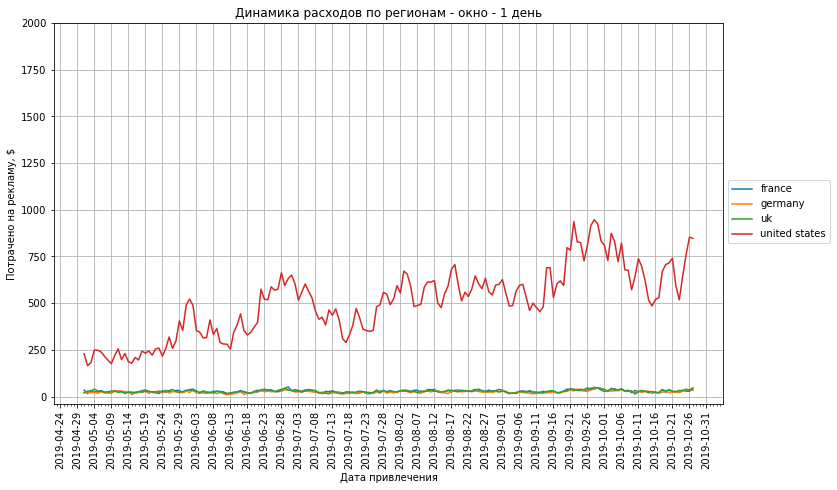

In [40]:
# Суммарные расходы на рекламу по регионам в динамике
ax = profiles.query('channel != "organic"').pivot_table(
    index = 'dt', columns = 'region', values = 'acquisition_cost', aggfunc = 'sum'
).plot(grid=True, figsize = (12,7))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.ylabel('Потрачено на рекламу, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика расходов по регионам - окно - 1 день')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.ylim((None,2000))
plt.xticks(rotation=90) 
plt.show()

In [41]:
profiles.query('channel != "organic"').pivot_table(
    index = 'dt', columns = 'region', values = 'acquisition_cost', aggfunc = 'sum'
).describe().T

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
france,180.0,28.199855,6.851546,15.031336,23.144467,27.860794,33.200160,51.365481
germany,180.0,24.579018,6.474325,9.406738,20.091109,24.317476,28.445509,47.123557
uk,180.0,28.158349,6.866068,13.739342,23.828479,27.597959,31.541731,49.240581
united states,180.0,505.158889,185.501678,165.005000,353.336250,519.135000,613.867500,946.595000


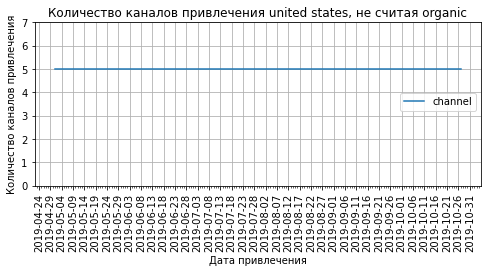

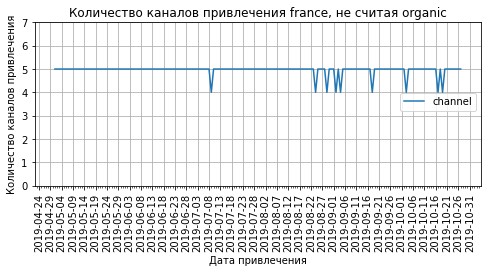

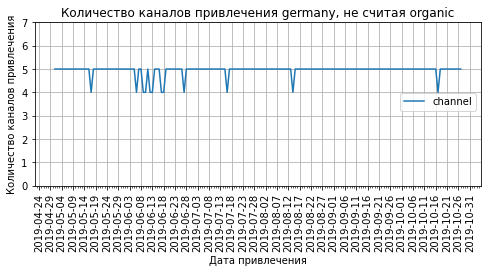

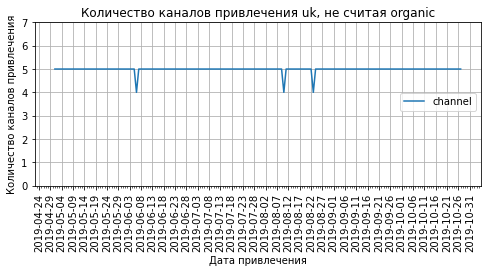

In [42]:
for country in profiles.region.unique():
    ax = profiles.query('channel != "organic"').query('region == @country').pivot_table(
        index = 'dt', values = 'channel', aggfunc = 'nunique'
    ).plot(grid=True, figsize = (8,3))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    plt.ylabel('Количество каналов привлечения')
    plt.xlabel('Дата привлечения')
    plt.title('Количество каналов привлечения '+country+', не считая organic')
    plt.legend(bbox_to_anchor=(1, 0.6))
    plt.ylim((0, 7))
    plt.xticks(rotation=90) 
    plt.show()
    

In [43]:
profiles.query('channel != "organic"').pivot_table(index = ['region', 'channel'], values = 'acquisition_cost', aggfunc = ['count', 'sum']).style.format(
    '{:.2f}').background_gradient('GnBu')

In [44]:
profiles.query('channel != "organic"').pivot_table(index = ['region'], values = 'acquisition_cost', aggfunc = ['count', 'sum']).sort_values(by = ('count', 'acquisition_cost')).style.format(
    '{:.2f}').background_gradient('GnBu')

,count,sum
,acquisition_cost,acquisition_cost
region,,
germany,9528.00,4424.22
france,11058.00,5075.97
uk,11154.00,5068.50
united states,61829.00,90928.60


Да, количество рекламных кампаний в каждом регионе было разным: причем в США было больше всего рекламных кампаний, на которые было больше всего потрачено бюджета.

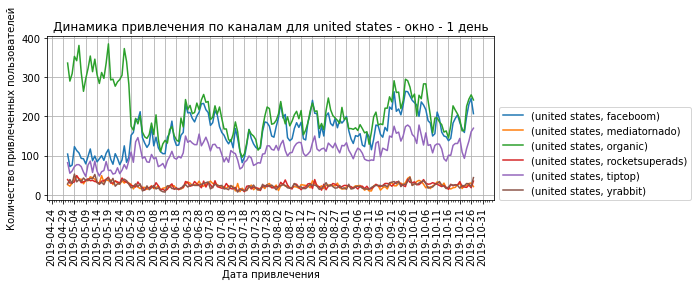

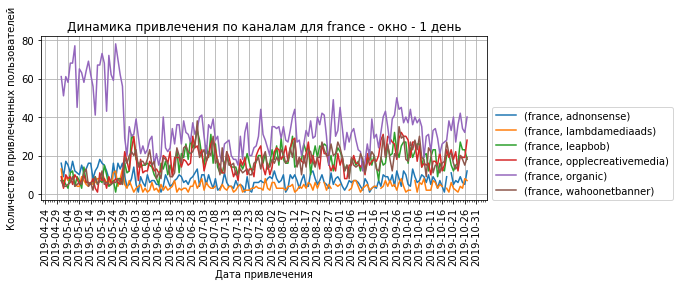

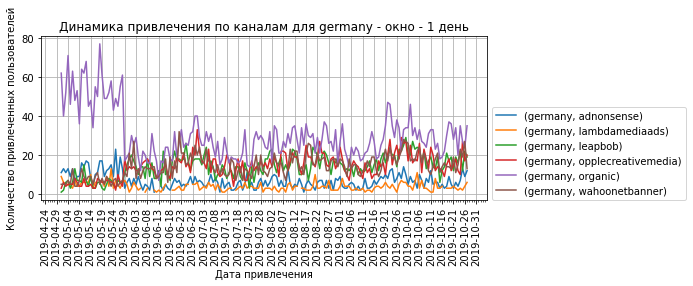

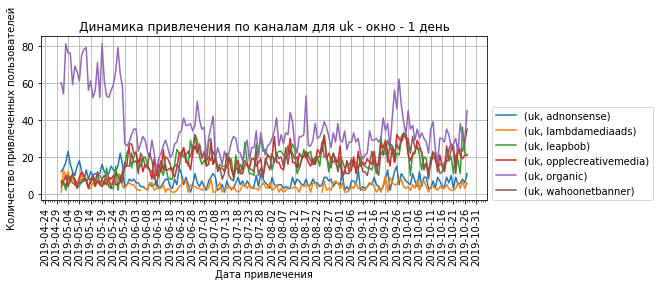

In [45]:
for country in profiles.region.unique():
    ax = profiles.query('region == @country').pivot_table(index='dt', columns =['region', 'channel'], values = 'user_id', aggfunc='nunique').plot(grid=True, figsize = (8,3))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    plt.ylabel('Количество привлеченных пользователей')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика привлечения по каналам для '+country+' - окно - 1 день')
    plt.legend(bbox_to_anchor=(1, 0.6))
    plt.xticks(rotation=90) 
    plt.show()


Рекламные кампании проводились не каждый день в штатах, затраты на рекламу разные: на запуск в штатах потрачено в разы больше.
Запуски в других регионах были на протяжении всего времени (минимум в нуле только у США)

Запуск на 5 площадках на протяжении всего времени был только у штатов, в других регионах иногда запускались только на 4 платформах. 

Платформы для запуска отличаются в регионах: выделен европейский рынок, на котором реклама запускалась с помощью adnonsense конкурирующая с lamdamediaads, leabob конкурирующая с opplecreativemedia и wahoonetbanner. На американском рынке используются другие площадки: faceboom конкурирующая с tiptop, rocketsuperads конкурирующая с yarabbit и mediatornado.

Органика по всем регионам была высокой до 29 мая, но в штатах она значительно выше. 

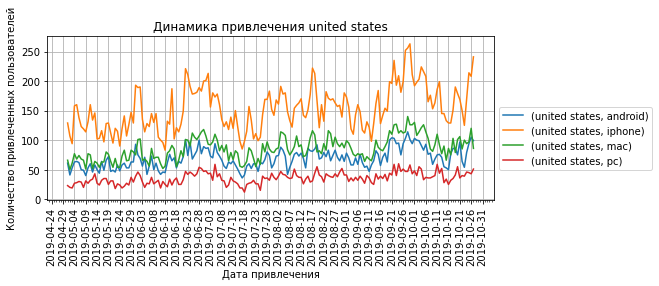

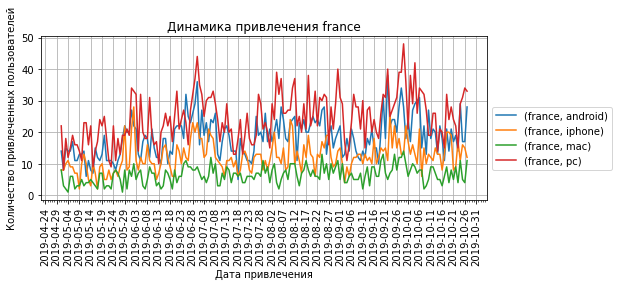

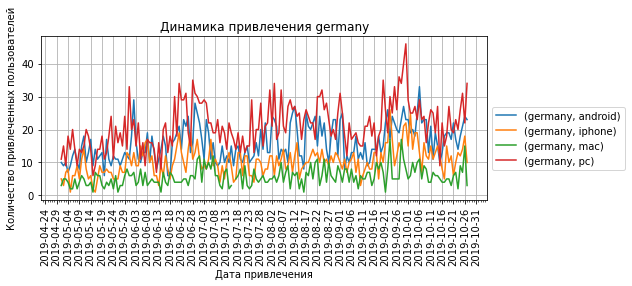

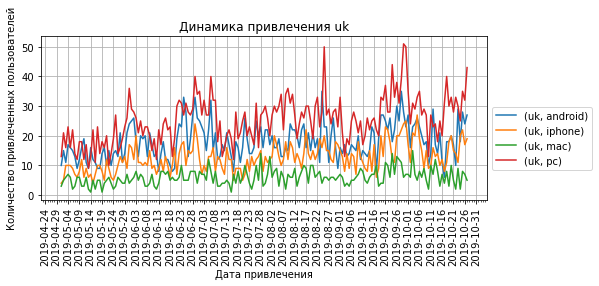

In [46]:
for country in profiles.region.unique():
    ax = profiles.query('channel !="organic"').query('region == @country').pivot_table(index='dt', columns =['region', 'device'], values = 'user_id', aggfunc='nunique').plot(grid=True, figsize = (8,3))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    plt.ylabel('Количество привлеченных пользователей')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика привлечения '+country)
    plt.legend(bbox_to_anchor=(1, 0.6))
    plt.xticks(rotation=90) 
    plt.show()

Целевая аудитория на рынках также разная: в Штатах хуже всего привлекаются пользователи pc, в то время как на европейском рынке они показывают высокую динамику привлечения. 
В Америке хорошо привлекаются пользователи, владеющие iphone.
размещение рекламы на Mac на европейском рынке хуже привлекает пользователей. 

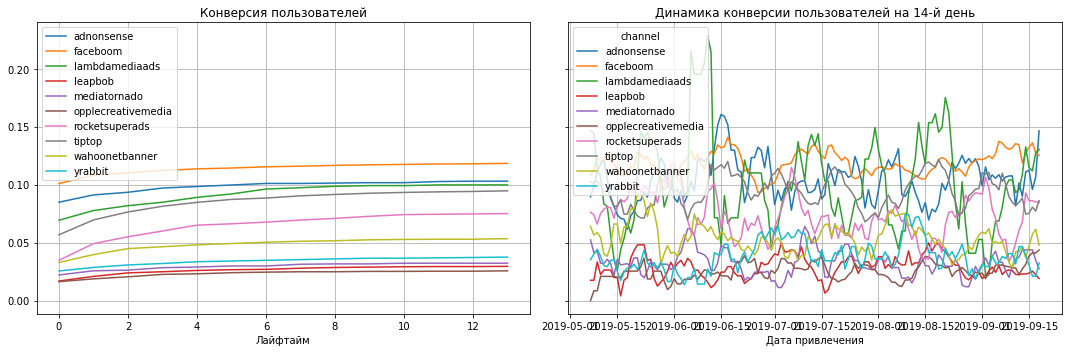

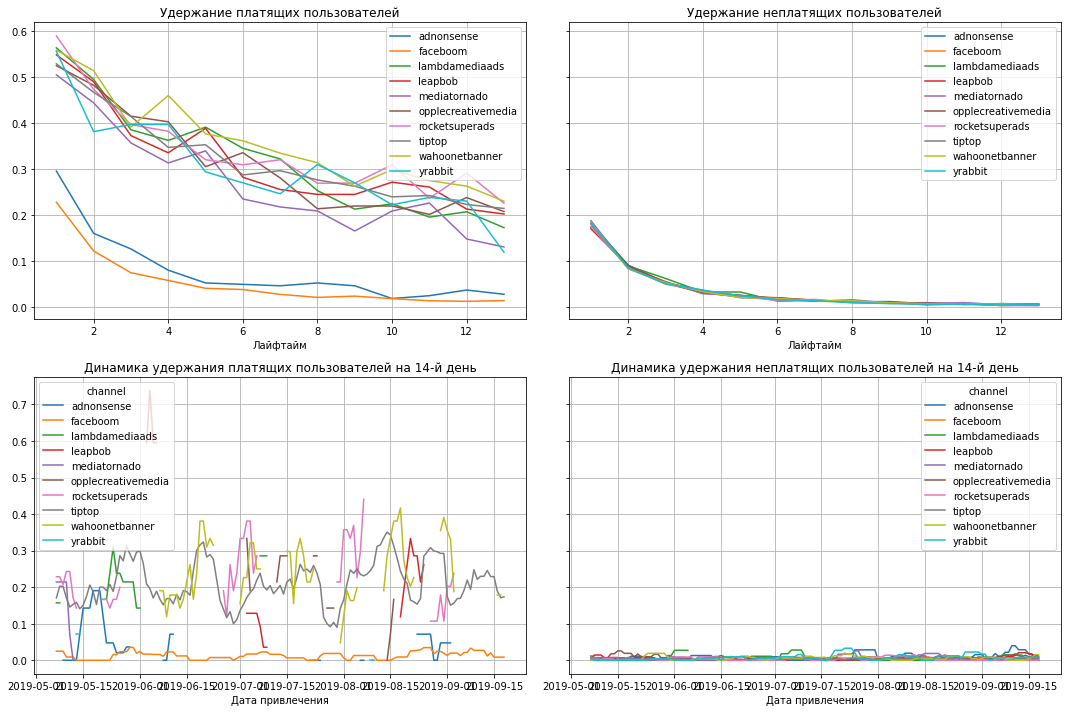

In [47]:
# смотрим конверсию с разбивкой по каналам - 2 графика

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel !="organic"'), orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel !="organic"'), visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)



**Вывод**
- Лучше всего конвертируются пользоватлеи с faceboom, yarabbit, lambdamediaads, tiptop, opplecreativemedia, leapbob. (Заметим, что меньше всего было выделено как раз на yarabbit, mediatornado, lambdamediaads,  leapbob, opplecreativemedia.
- Хуже всего удерживаются платящие пользователи adnonsense, faceboom - на 40% пользователей меньше.

## Выводы <a id="step6"></a>   

### 6.1. Причины неэффективности привлечения пользователей. <a id="#step61"></a>   

Реклама не окупается. Двухнедельный LTV пользователей, зарегистрировавшихся за весь период, составил 90 центов при средней стоимости привлечения клиентов 1,127$. Компания выходит в плюс только за счет органического траффика. 

Факторы, снижающие окупаемость рекламы:
- пользователей Штатов, исполюзующизх mac, iphone, android и реклама на которых настраивается челез каналы faceboom, tiptop; 
- канала adnonsense (Франция, Германия, Великобритания) - платящие пользователи удерживаются на 40% хуже в сравнении с другими каналами. 

- Несмотря на огромные вложения в tiptop, размещение рекламы на данной платформе не окупает расходы: значение ROI едва доходит до единицы. Но думаю, это связано с тем, что платформа, скорее всего, нацелена на охват аудитории - знакомство с продуктом (?)

На мой взгляд проблема неокупаемости связана с тем, что цель рекламной кампании в штатах была неявно сформулирована: во-первых, показатели привлечения пользователей были высокие (именно в эти каналы вкладывалось большая часть рекламного бюджета), во-вторых, акцент делался на пользователей mac, iphone, android.

В среднем месячный рекламный бюджет на все кампании составил:  17582.88

Средняя стоимость привлечения клиента за все время: 1.127

Рекламные кампании проводились не каждый день в штатах, затраты на рекламу разные: на запуск в штатах потрачено в разы больше. Запуски в других регионах были на протяжении всего времени (минимум в нуле только у США). Также количество реламных кампаний в штатах было больше, чем во всех других регионах.

Платформы для запуска отличаются в регионах: выделен европейский рынок, на котором реклама запускалась с помощью adnonsense конкурирующая с lamdamediaads, leabob конкурирующая с opplecreativemedia и wahoonetbanner. На американском рынке используются другие площадки: faceboom конкурирующая с tiptop, rocketsuperads конкурирующая с yarabbit и mediatornado.

### 6.2. Рекомендации для отдела маркетинга. <a id="step62"></a>   

Есть ряд каналов, запуск рекламы на которых окупается уже во второй день: yarabbit, mediatornado, lamdamediaads.

Обратим также внимание на стремительный рост LTV по каналам lamdamediaads, wahoonetbanner, rocketsuperads

CAC для этих каналов постоянный, для rocketsuperads - падал в динамике (с 0,5 до 0,3). Самый высокий CAC у lamdamediaads (1), низкий - yarabbit (примерно 0,2).

Стоит учитывать особенности целевой аудитории на рынках: в Штатах хуже всего привлекаются пользователи pc, в то время как на европейском рынке они показывают высокую динамику привлечения. В Америке хорошо привлекаются пользователи, владеющие iphone. Размещение рекламы на Mac на европейском рынке хуже привлекает пользователей.

Стоит также обратить внимание на рекламные кампании в Штатах: LTV в сравнении с другими регионами слишком большой, возможно реклама таргетируется не на ту целевую аудиторию.

Для того, чтобы повысить конверсию пользователей в покупаетелей, стоит посмотреть путь пользователя в приложении: может быть такое, что пользователи готовы  приобрести товар, но сталкиваются с проблемами в работе сервиса: может не работает какая-нибудь кнопка, или сложная система регистрации, или просто нельзя оплатить, или система требует авторизацию каждый раз при входе. Думаю, с похожей проблемой столкнулись пользователи pc, так как у них значительно снижена конверсия.

Органика по всем регионам была высокой до 29 мая, но в штатах она значительно выше. Если в данный период приложение только вышло, возможно такой показатель был сформирован из-за ажиотажного спроса (?) или наоборот, он упал после выхода обновления или еще каких-то возможжных проблем с приложением - следует просмотреть отзывы и поддержку приложения. Вообще про органику забывать не стоит: только за этот период органика принесла 1160 платящих из 56439 пользователей, при том, что был спад в июне с приходов. Если улучшить оптимизацию сайта для поисковых запросов, можно значительно увеличить количество платящих.